In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
key="0d1135967c78f8865e55fac4880286be95745e12"
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pdr.get_data_tiingo('AAPL',start='01-04-2017',end='17-04-2020', api_key=key)
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-01-04 00:00:00+00:00,116.02,116.5100,115.75,115.85,21118116,27.466825,27.582829,27.402905,27.426579,84472464,0.0,1.0
1,AAPL,2017-01-05 00:00:00+00:00,116.61,116.8642,115.81,115.92,22193587,27.606503,27.666683,27.417109,27.443151,88774348,0.0,1.0
2,AAPL,2017-01-06 00:00:00+00:00,117.91,118.1600,116.47,116.78,31751900,27.914268,27.973454,27.573359,27.646749,127007600,0.0,1.0
3,AAPL,2017-01-09 00:00:00+00:00,118.99,119.4300,117.94,117.95,33561948,28.169950,28.274116,27.921370,27.923738,134247792,0.0,1.0
4,AAPL,2017-01-10 00:00:00+00:00,119.11,119.3800,118.30,118.77,24462051,28.198359,28.262279,28.006597,28.117866,97848204,0.0,1.0


In [4]:
df = df.drop(columns=['symbol','high','low','open','volume','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1)
df.head()

,date,close
0,2017-01-04 00:00:00+00:00,116.02
1,2017-01-05 00:00:00+00:00,116.61
2,2017-01-06 00:00:00+00:00,117.91
3,2017-01-09 00:00:00+00:00,118.99
4,2017-01-10 00:00:00+00:00,119.11


In [6]:
#df['date'].dt.tz_localize(None)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:
df = df.rename(columns = {"date":"ds","close":"y"})

In [9]:
df['ds'] = df['ds'].dt.tz_convert(None)

In [10]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


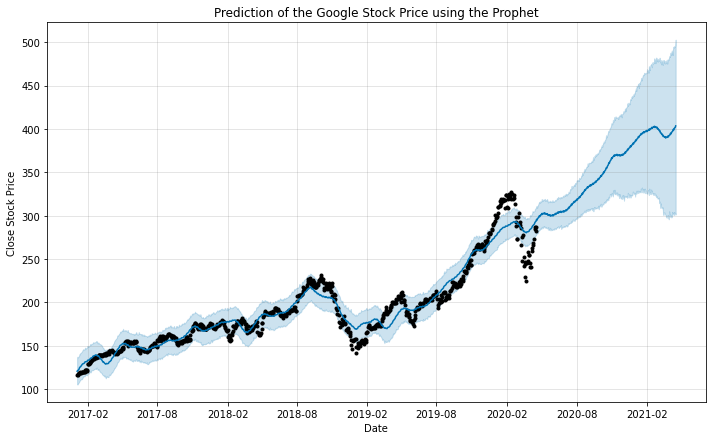

In [11]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Apple Inc. Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

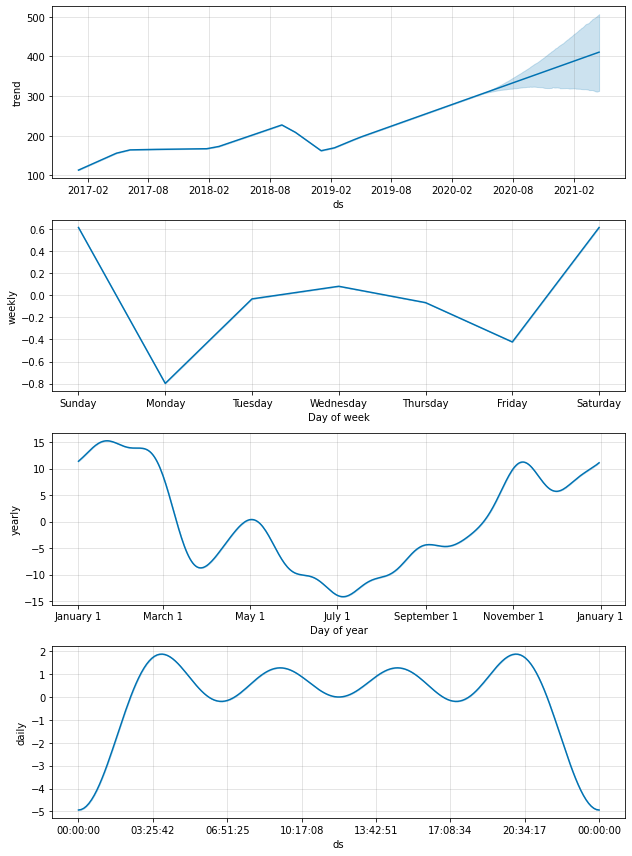

In [12]:
m.plot_components(prediction)
plt.show()